## **Coronavirus Bar Chart Race - The Race No One Wants To Win**
***The death toll from the coronavirus in the United States passed 50,000 Friday morning (04/23/2020), accounting for more than 25% of COVID-19 deaths globally, according to a tally from Johns Hopkins University. More than 2.7 million COVID-19 cases have been confirmed worldwide, with over 880,000 of them in the United States.***

![](https://www.strategy-business.com/media/image/42769364_1000x600.jpg)

To prevent the spread of COVID-19:
* Clean your hands often. Use soap and water, or an alcohol-based hand rub.
* Maintain a safe distance from anyone who is coughing or sneezing.
* Don’t touch your eyes, nose or mouth.
* Cover your nose and mouth with your bent elbow or a tissue when you cough or sneeze.
* Stay home if you feel unwell.
* If you have a fever, a cough, and difficulty breathing, seek medical attention. Call in advance.
* Follow the directions of your local health authority.
* Avoiding unneeded visits to medical facilities allows healthcare systems to operate more effectively, therefore protecting you and others.

**In this notebook, I selected the Top 10 countries with most cases of coronavirus. I illustrated how the cases are growing in these countries through a bar chart race. **

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
# read the file
fullData = pd.read_csv("../input/covid19-dataset/full_data.csv")

We will use a full dataset (fullData) to make the bar chat race, let's have a quick look about this dataset.

In [3]:
fullData.head()

date     location  new_cases  new_deaths  total_cases  total_deaths
0  2019-12-31  Afghanistan          0           0            0             0
1  2020-01-01  Afghanistan          0           0            0             0
2  2020-01-02  Afghanistan          0           0            0             0
3  2020-01-03  Afghanistan          0           0            0             0
4  2020-01-04  Afghanistan          0           0            0             0

We want to see how confirmed cases (total_cases) change in different countries. 

To do so, I kept these three columns: 'date', 'location' and 'total_cases'.

In [4]:
df = pd.read_csv("../input/covid19-dataset/full_data.csv",
                 usecols=['date','location','total_cases'])

In [5]:
df.head()

date     location  total_cases
0  2019-12-31  Afghanistan            0
1  2020-01-01  Afghanistan            0
2  2020-01-02  Afghanistan            0
3  2020-01-03  Afghanistan            0
4  2020-01-04  Afghanistan            0

When I sorted the data by total number of cases, I found that this dataset also counts the total world cases. So I removed the row where the location shows 'World'.

In case there are missing values, I filled NA values with 0.

In [6]:
df.drop(df[df['location'] == 'World' ].index, inplace=True)
df.fillna(0)
df

date     location  total_cases
0      2019-12-31  Afghanistan            0
1      2020-01-01  Afghanistan            0
2      2020-01-02  Afghanistan            0
3      2020-01-03  Afghanistan            0
4      2020-01-04  Afghanistan            0
...           ...          ...          ...
12706  2020-04-19     Zimbabwe           25
12707  2020-04-20     Zimbabwe           25
12708  2020-04-21     Zimbabwe           25
12709  2020-04-22     Zimbabwe           28
12710  2020-04-23     Zimbabwe           28

[12596 rows x 3 columns]

Now the data is clean, we can go to our main step. We find the ten countries that have the most cases on the last day of this dataset. 

You can also check the top 11 countries (using 'head(11)') or as many as you want (using 'head(x)').  

In [7]:
end = df['date'].max()
dff = (df[df['date'].eq(end)]
       .sort_values(by='total_cases', ascending=False).head(10))
dff

date        location  total_cases
12211  2020-04-23   United States       842629
10822  2020-04-23           Spain       208389
6097   2020-04-23           Italy       187327
4494   2020-04-23         Germany       148046
12096  2020-04-23  United Kingdom       133495
4153   2020-04-23          France       119151
11768  2020-04-23          Turkey        98674
5610   2020-04-23            Iran        85996
2513   2020-04-23           China        83876
9778   2020-04-23          Russia        57999

Now that we have the Top 10 countries, we can update our data frame to only have these 10 countries.

In [8]:
array = ['Russia', 'China', 'Iran', 'Turkey','Italy','Spain','France', 'United Kingdom', 'Germany','United States']
df = df.loc[df['location'].isin(array)]
df

date       location  total_cases
2399   2019-12-31          China           27
2400   2020-01-01          China           27
2401   2020-01-02          China           27
2402   2020-01-03          China           44
2403   2020-01-04          China           44
...           ...            ...          ...
12207  2020-04-19  United States       735086
12208  2020-04-20  United States       759687
12209  2020-04-21  United States       787752
12210  2020-04-22  United States       825041
12211  2020-04-23  United States       842629

[1076 rows x 3 columns]

Let's make a simple horizontal bar chart.

<BarContainer object of 10 artists>

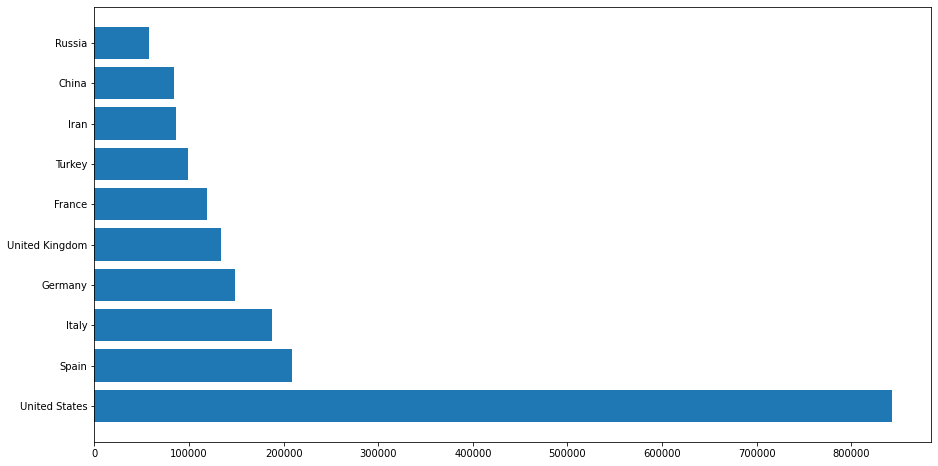

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['location'], dff['total_cases'])

**Make it fancy!**
> **Add values, labels and colors for each country**

>**Here is the link for picking the colors: https://htmlcolorcodes.com/color-picker/**

In [10]:
colors = dict(zip(
    ['Russia', 'China', 'Iran', 'Turkey','Italy','Spain',
     'France', 'United Kingdom', 'Germany','United States'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381','#9e9395','#f2eea7',
     '#aafbff', '#f7bb5f', '#eafb50', '#f26d85']
))

 Show the country with the most cases on top (using dff = dff[::-1]).

Text(1, 0.4, '2020-04-23')

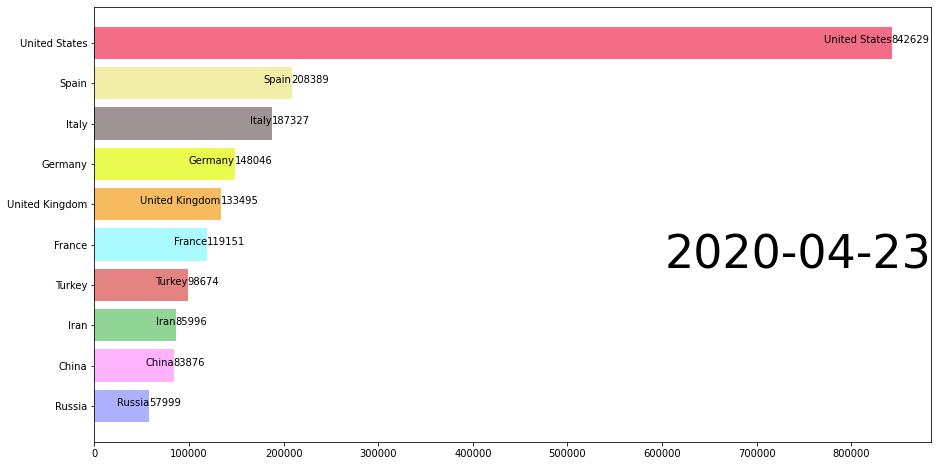

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1] 
ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])
for i, (total_cases, location) in enumerate(zip(dff['total_cases'], dff['location'])):
    ax.text(total_cases, i,     location,            ha='right') 
    ax.text(total_cases, i,     total_cases,           ha='left')
ax.text(1, 0.4, end, transform=ax.transAxes, size=46, ha='right')

We will style following items:
* Text: Update font sizes, color, orientation
* Axis: Move X-axis to top, add color & subtitle
* Grid: Add lines behind bars
* Format: comma separated values and axes tickers
* Add title, credits, gutter space
* Remove: box frame, y-axis labels

We will also make a function called 'draw_barchart', and we will call this function to animate the race.

In [12]:
def draw_barchart(date):
        
    dff = (df[df['date'].eq(date)]
           .sort_values(by='total_cases', ascending=False)
           .head(10))
    
    ax.clear()
    dff = dff[::-1]
    ax.barh(dff['location'], dff['total_cases'], color=[colors[x] for x in dff['location']])
    
    dx = dff['total_cases'].max() / 200
    for i, (total_cases, location) in enumerate(zip(dff['total_cases'], dff['location'])):
        ax.text(total_cases-dx, i,     location,           size=14, weight=600, ha='right', va='bottom')
        ax.text(total_cases+dx, i,     f'{total_cases:,.0f}',  size=14, ha='left',  va='center')
        
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Confirmed Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Confirmed Coronavirus cases in the world',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @minaliu', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)


Here is how the case numbers look on the last day of this dataset.

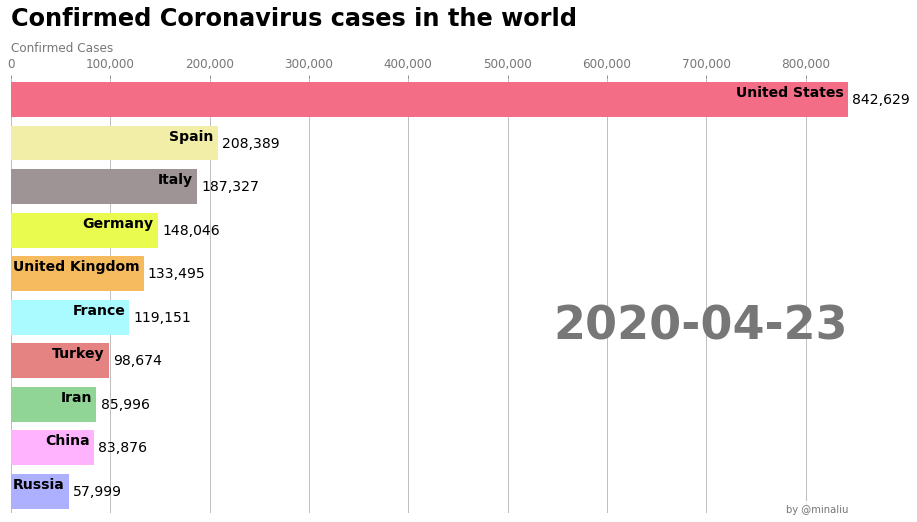

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(df['date'].max())

Here is how the cases look on the first day of this dataset.

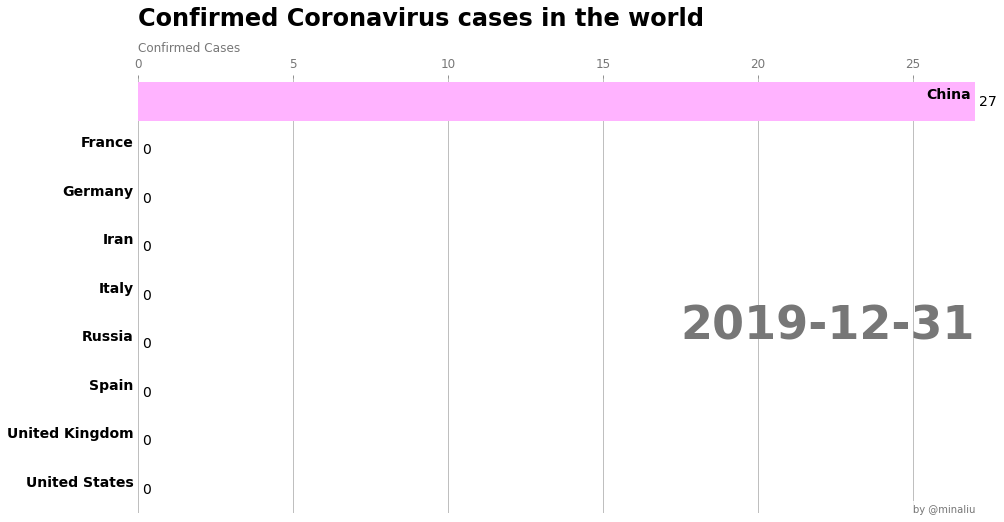

In [14]:
start = df['date'].min()
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(start)

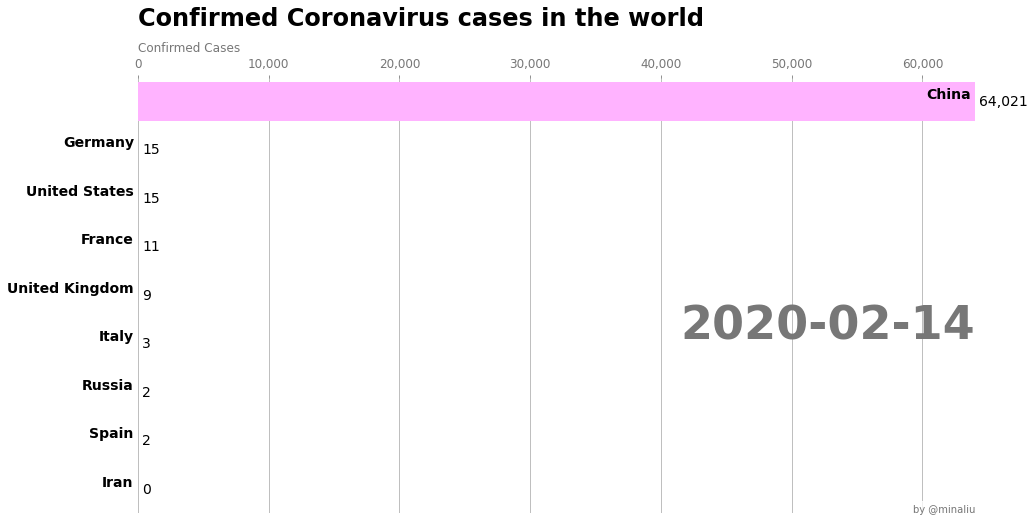

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart('2020-02-14')

We'll animate the race and run from the first day of the dataset (2019/12/31) to the last day of the dataset 2020/04/23:

*Use 'frames' to accept the values we want to run. We cannot put our dates into 'range()', first we have to convert dates to an array. *

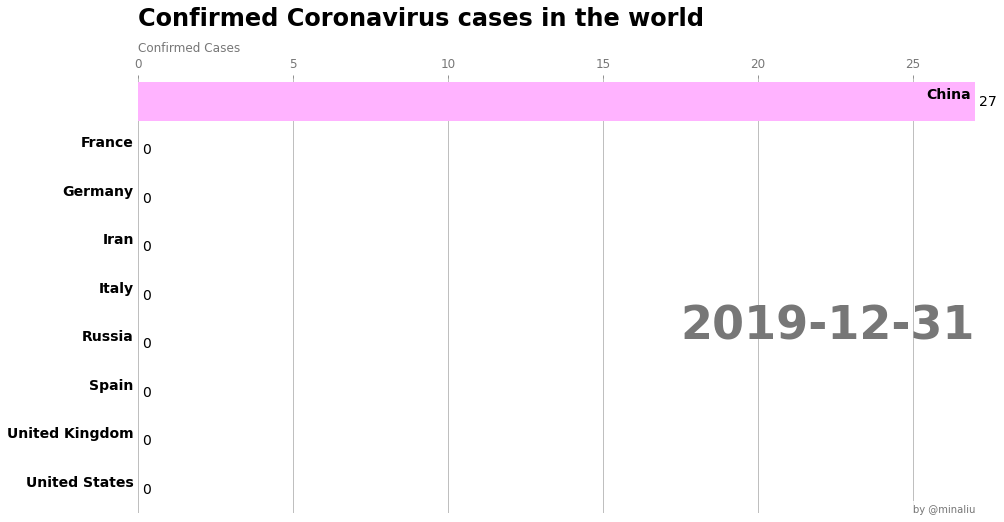

In [16]:
dates = df.date.unique()
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=dates)
HTML(animator.to_jshtml()) 